Author : Amine MEKKI

Project Name : Study of attentional deficit

Project Duration   : 2023-10-12 -> 2023-11-11


Find something that holds students from being attentive (interactive) in school. or something that can be improved in the school.
and propose a solution. Something that can be done.
3-5 members . the next time we will meet 7 november. We have to send her an excel with the groups with a team name and propose something that we want to improve

I identified the problem of Forum of companies. I noticed that the diversity of the companies is biased. We see more Civil engineering companies than other fields. Also the companies were not well placed at the forum. I would have been better if we separated them into categories so as we can be well oriented. 

why ? The goal (Not intention )

# 1. Importing libraries

In [149]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt


# 2. Helping Functions

In [150]:
# Reading EGG data
def read_eeg_data(path_set_data):
    import mne
    epochs = mne.io.read_epochs_eeglab(path_set_data)
    return epochs

# Filtering EGG data
def filter_eeg_data(data, low_pass_freq=1, high_pass_freq=30):
    filtered_data = data.copy()
    filtered_data = filtered_data.filter(low_pass_freq, high_pass_freq, fir_design='firwin')
    return filtered_data, data


# 3. Importing data

Make sure you have the SET and FDT files in the same folder 

In [151]:
subject_id = "10"
path_set_data = f"./../artifacts/data/raw/AEP/Subject_{subject_id}_H_AEP_Run_01.set"
raw_set_data = read_eeg_data(path_set_data)


Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\artifacts\data\raw\AEP\Subject_10_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Amine\AppData\Local\Temp\ipykernel_25020\3392643457.py:4: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs = mne.io.read_epochs_eeglab(path_set_data)


# 4. Data Vizualisation

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


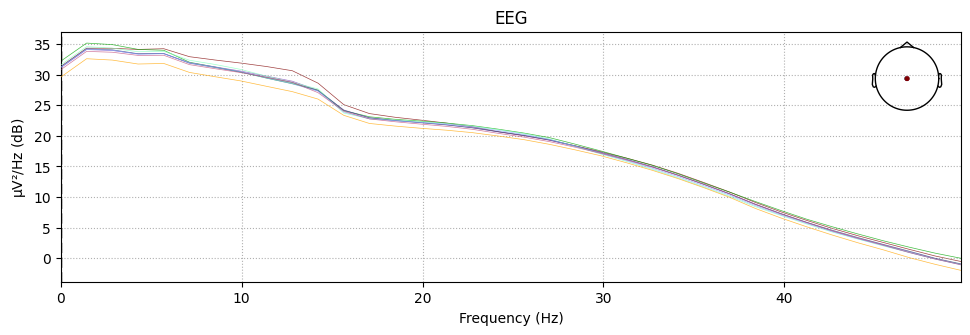

In [152]:
raw_set_data.plot_psd(fmax=50)

In [153]:
filtered_set_data,  raw_set_data = filter_eeg_data(raw_set_data, low_pass_freq=12, high_pass_freq=30)


Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 s)



C:\Users\Amine\AppData\Local\Temp\ipykernel_25020\3392643457.py:10: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_data = filtered_data.filter(low_pass_freq, high_pass_freq, fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 

In [154]:
filtered_set_data

Number of events,480
Events,0: 4201: 60
Time range,-0.102 – 0.598 s
Baseline,off


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


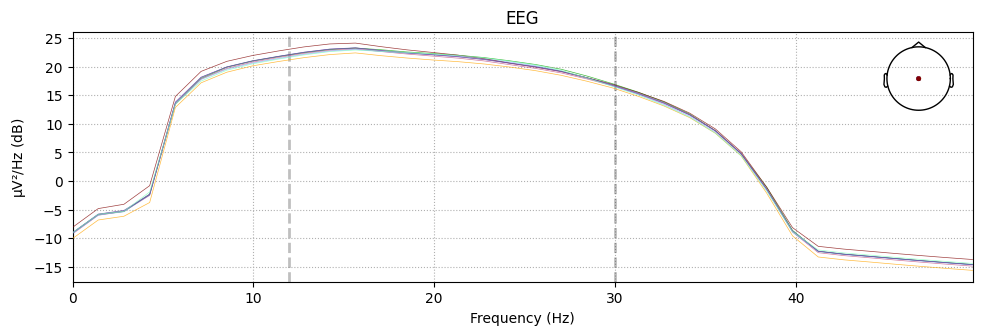

In [155]:
filtered_set_data.plot_psd(fmax=50)

In [156]:
raw_set_data

Number of events,480
Events,0: 4201: 60
Time range,-0.102 – 0.598 s
Baseline,off


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


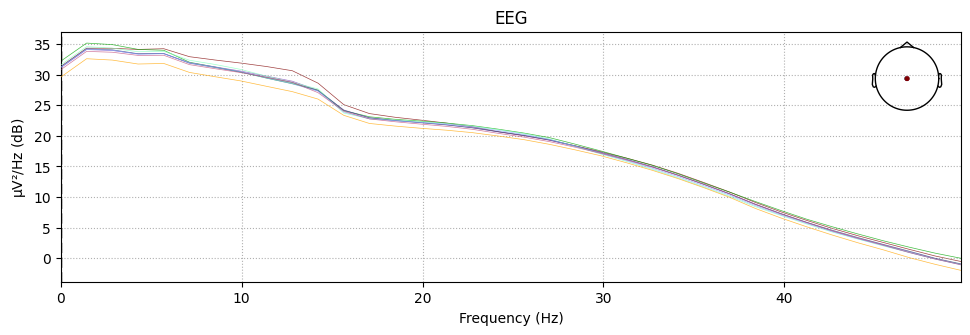

In [157]:
raw_set_data.plot_psd(fmax=50)

In [158]:
events_num = raw_set_data.events
event_id = {'Frequent': 1, 'Target': 2}

print("Events Number : ", events_num)
print("Events ID : ", event_id)

# pritn only the unique values of the 3 column
print("Events Unique : ", np.unique(events_num[:, 2]))

Events Number :  [[   27     0     1]
 [  207     0     1]
 [  387     0     1]
 ...
 [85887     0     1]
 [86067     0     1]
 [86247     0     1]]
Events ID :  {'Frequent': 1, 'Target': 2}
Events Unique :  [1 2]


=> Event Number Explanations 
- Column 1 : Represent the sample number at which the event occurs.
- Column 2 : Represent the value of trigger channel immediately before the event occurs.
- Column 2 : The Event type

=> Event ID
- Frequent : The event type labeled as Frequent. -> No HIT
- Target : The event type labeled as Target. -> Hit

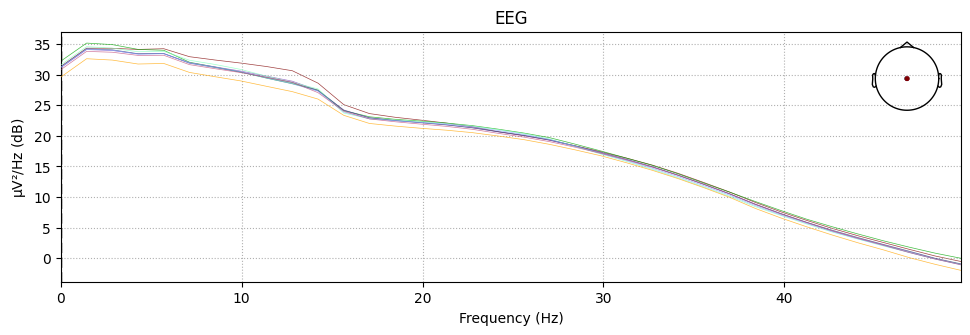

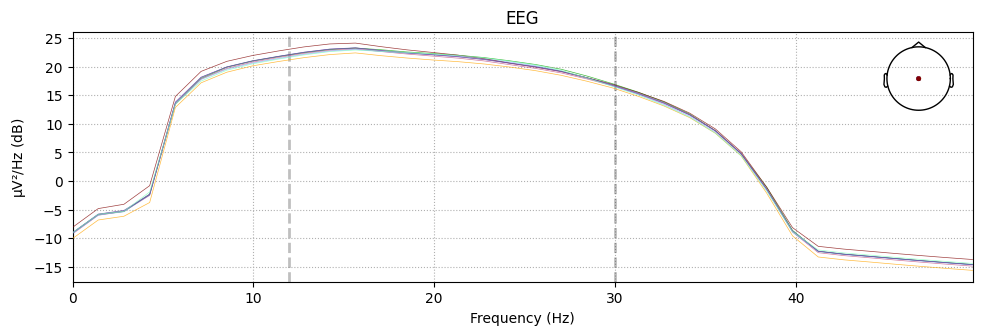

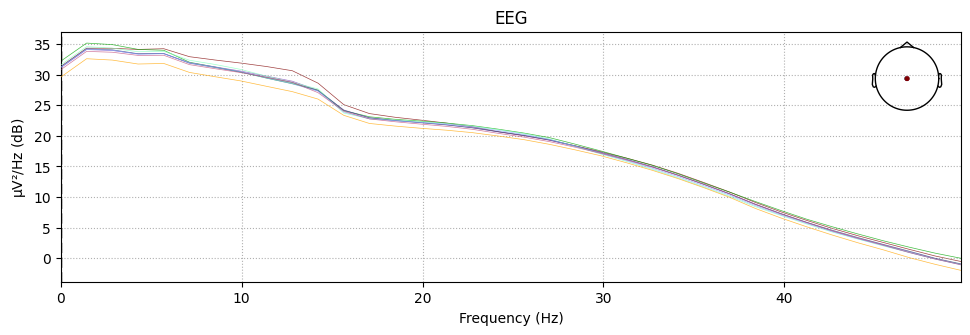

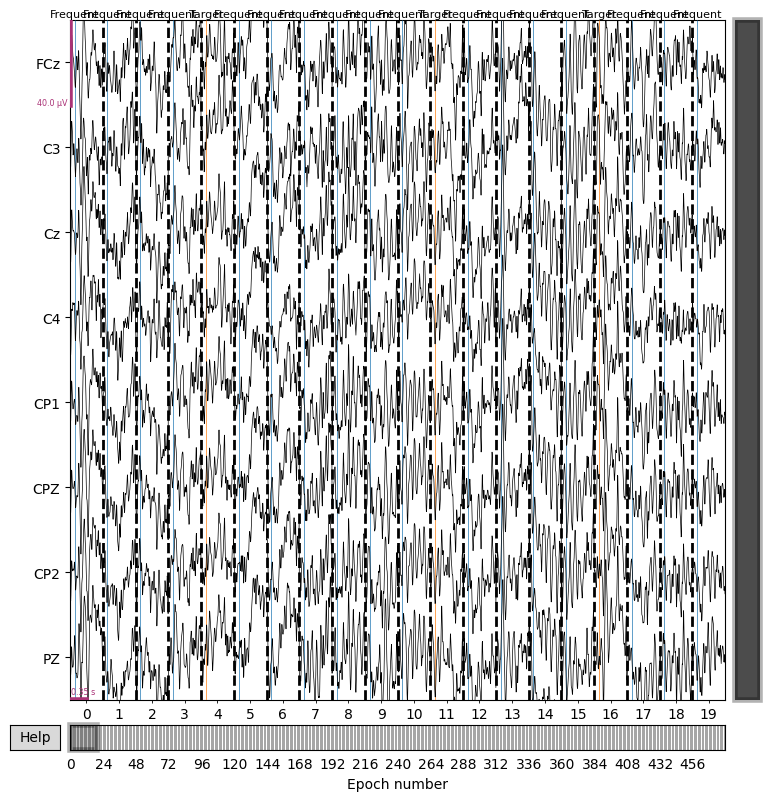

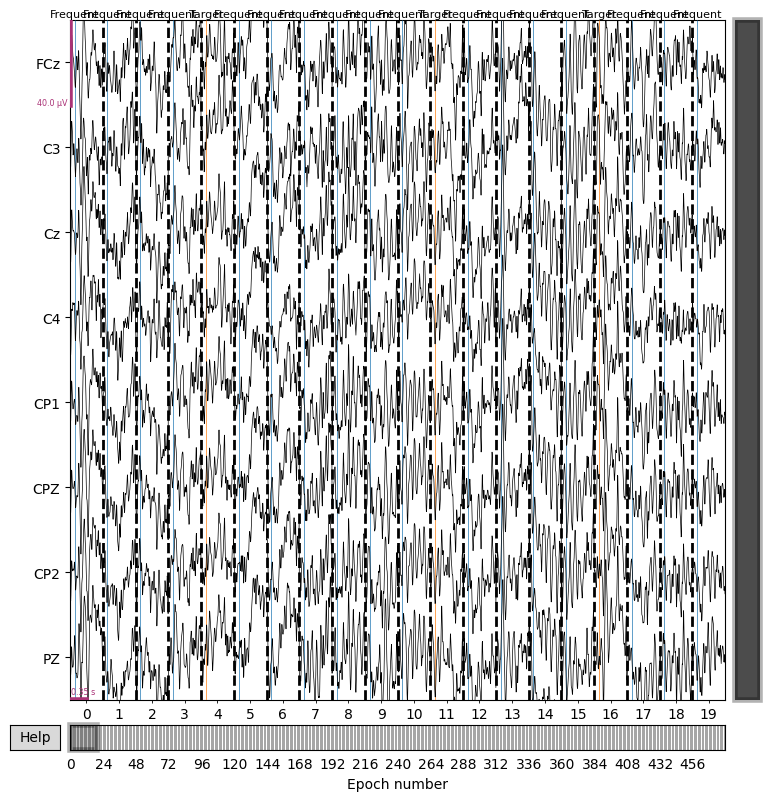

In [159]:
raw_set_data.plot(butterfly=False, events=events_num, event_id=event_id)

In [160]:
t = raw_set_data.times
x = raw_set_data.get_data()
y = raw_set_data.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.7e-06 (2.2e-16 eps * 8 dim * 3.8e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-0.99787465 -1.34412989 -0.50503317 -0.86652622 -2.44566001 -1.097038  ]
 [-1.03807708 -1.6138854  -0.79961586 -2.10420023 -2.0577819  -0.7913138 ]
 [-1.13875222 -0.82803139 -1.41704646 -1.67492326  0.07003343 -0.47025006]
 ...
 [-1.64364056 -0.2886099  -1.11565476 -1.46211021 -1.46864071 -1.40917851]
 [-0.22733388  1.8761026  -0.63687756 -1.54930316  1.33001672  0.11504964]
 [-0.22036474 -1.17774898 -0.99800329 -0.63669

In [161]:
classes, counts = np.unique(y, return_counts=True)

print(classes)
print(counts)

[1 2]
[420  60]


In [162]:
dataframe = raw_set_data.to_data_frame()

In [163]:
dataframe["condition"].value_counts()


condition
0    75600
1    10800
Name: count, dtype: int64


index, time,	condition,	epoch,	FCz,	C3,	Cz,	C4,	CP1,	CPZ,	CP2,	PZ
0,	-0.101562,	0,	0,	-3.427878,	-1.667474,	-0.802080,	-4.381918,	-0.174278,	-0.473131,	-0.163574,	4.660465,
1,	-0.097656,	0,	0,	-8.030498,	-5.714919,	-6.021495,	-9.140140,	-4.097731,	-4.995475,	-5.006450,	0.328639,
2,	-0.093750,	0,	0,	-12.204739,	-9.192562,	-10.803728,	-13.798221,	-7.612343,	-9.127052,	-9.563060,	-4.025062,
3,	-0.089844,	0,	0,	-14.618117,	-10.794290,	-13.756866,	-17.023266,	-9.496852,	-11.647972,	-12.585023,	-7.126840,
4,	-0.085938,	0,	0,	-13.940884	,-9.517207,	-13.604451,	-17.497742,	-8.784636,	-11.424931,	-12.910678,	-7.753216,
...	...	...	...	...	...	...	...	...	...	...	...
86395,	0.582031,	0,	479,	-8.737986,	-12.842310,	-8.304275,	-10.556507,	-17.716669,	-7.304700,	-5.213340,	-11.689865
86396,	0.585938,	0,	479,	-6.795352,	-12.303147,	-8.081225,	-11.125897,	-17.557266,	-8.531563,	-6.678074,	-15.534058
86397,	0.589844,	0,	479,	-5.218862,	-12.518800,	-8.547914,	-12.773150,	-18.041786,	-10.630665,	-8.928396,	-20.017923
86398,	0.593750,	0,	479,	-4.161735,	-12.805143,	-9.360358,	-14.699680,	-18.484549,	-12.726720,	-11.071294,	-23.846109
86399,	0.597656,	0,	479,	-3.538136,	-12.311877,	-9.826063,	-16.024157,	-17.919411,	-13.681179,	-12.003203,	-25.534645
86400 rows × 11 columns

# 5. Data Processing

## 5.1 Feature Engineering 

In [164]:
from typing import Tuple
import numpy as np
import pandas as pd
import mne
from scipy.stats import skew, kurtosis
from scipy.fftpack import fft
from scipy.signal import welch
from pywt import wavedec


def get_features(data: mne.epochs, num_channels: int = 8) -> Tuple[np.ndarray, np.ndarray, pd.DataFrame]:

    features = []

    col_names = []

    for epoch in data._data:
        epoch_features = []
        for channel_idx, channel_data in enumerate(epoch):

            mean = np.mean(channel_data)
            var = np.var(channel_data)
            skewness = skew(channel_data)
            kurt = kurtosis(channel_data)

            fft_vals = np.abs(fft(channel_data))
            fft_mean = np.mean(fft_vals)
            fft_var = np.var(fft_vals)
            _, psd = welch(channel_data, fs=256)
            psd_mean = np.mean(psd)
            psd_var = np.var(psd)
            spectral_entropy = -np.sum(psd*np.log2(psd))

            coeffs = wavedec(channel_data, 'db1', level=4)
            wavelet_coeffs_mean = np.mean(coeffs[-1])
            wavelet_coeffs_var = np.var(coeffs[-1])

            first_diff = np.diff(channel_data)
            second_diff = np.diff(first_diff)
            activity = np.var(channel_data)
            mobility = np.sqrt(np.var(first_diff) / activity)
            complexity = np.sqrt(np.var(second_diff) /
                                 np.var(first_diff)) / mobility

            min_val = np.min(channel_data)
            max_val = np.max(channel_data)
            zero_crossings = len(np.where(np.diff(np.sign(channel_data)))[0])

            channel_features = [mean, var, skewness, kurt,
                                fft_mean, fft_var, psd_mean, psd_var, spectral_entropy,
                                wavelet_coeffs_mean, wavelet_coeffs_var,
                                activity, mobility, complexity,
                                min_val, max_val, zero_crossings]

            epoch_features.extend(channel_features)

        features.append(epoch_features)

    channel_names = ['mean', 'var', 'skewness', 'kurt',
                     'fft_mean', 'fft_var', 'psd_mean', 'psd_var', 'spectral_entropy',
                     'wavelet_coeffs_mean', 'wavelet_coeffs_var',
                     'activity', 'mobility', 'complexity',
                     'min_val', 'max_val', 'zero_crossings']

    for i in range(1, num_channels + 1):
        for feature in channel_names:
            col_names.append(f'Ch{i}_{feature}')

    features_df = pd.DataFrame(features, columns=col_names)

    target = data.events[:, -1]

    return np.array(features), target, features_df



## 5.2 Feature Selection

In [165]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from typing import Tuple, Optional
from sklearn.base import BaseEstimator
from sklearn.feature_selection import RFE

import pandas as pd
import numpy as np


def feature_selection_RFC(
    X: pd.DataFrame,
    y: pd.Series,
    model: Optional[RFC] = None
) -> Tuple[pd.DataFrame, BaseEstimator]:
    if model is None:
        model = RFC(n_estimators=100, random_state=0)
    model.fit(X, y)
    sel = SelectFromModel(model, prefit=True)
    X_new = sel.transform(X)
    return pd.DataFrame(X_new), model

def feature_selection_LDA(
    X: pd.DataFrame,
    y: pd.Series,
    model: Optional[LDA] = None
) -> Tuple[pd.DataFrame, BaseEstimator]:
    if model is None:
        model = LDA()
    model.fit(X, y)
    sel = SelectFromModel(model, prefit=True)
    X_new = sel.transform(X)
    return pd.DataFrame(X_new), model

def feature_selection_RFE(
    X: pd.DataFrame,
    y: pd.Series,
    model: Optional[LinearSVC] = None,
    n_features_to_select: Optional[int] = None
) -> Tuple[pd.DataFrame, BaseEstimator]:
    if model is None:
        model = LinearSVC()
    selector = RFE(model, n_features_to_select=n_features_to_select)
    selector = selector.fit(X, y)
    X_new = selector.transform(X)
    return pd.DataFrame(X_new), selector


In [166]:
x, y, features_df = get_features(filtered_set_data)

c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '


# 6. Modelisation

In [167]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np
from typing import Dict, List, Union, Tuple
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def evaluate_model(
    model: BaseEstimator,
    X_train: np.ndarray,
    X_test: np.ndarray,
    y_train: np.ndarray,
    y_test: np.ndarray,
    include_auc: bool = True
) -> Tuple[float, float, float, float, Union[float, str], np.ndarray]:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    if cm.shape == (1, 1):
        if (y_test[0] == 2) and (y_pred[0] == 2):
            cm = np.array([[0, 0], [0, cm[0][0]]])
        elif (y_test[0] == 1) and (y_pred[0] == 1):
            cm = np.array([[cm[0][0], 0], [0, 0]])
        elif (y_test[0] == 1) and (y_pred[0] == 2):
            cm = np.array([[0, cm[0][0]], [0, 0]])
        elif (y_test[0] == 2) and (y_pred[0] == 1):
            cm = np.array([[0, 0], [cm[0][0], 0]])
        else:
            print("Something wrong with the confusion matrix")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(
        y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    if include_auc and hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X_test)[:, 1]
        try:
            roc_auc = roc_auc_score(y_test, proba)
        except ValueError as e:
            print(str(e))
            roc_auc = "Not available"
    else:
        roc_auc = "Not available"

    return accuracy, precision, recall, f1, roc_auc, cm, model


def compute_average_metrics(metrics: Dict[str, List[Union[float, str, np.ndarray]]]) -> Dict[str, Union[float, np.ndarray]]:
    avg_metrics = {}
    for key, values in metrics.items():
        if key != 'confusion_matrix':
            if len([x for x in values if x != "Not available"]) > 0:
                avg_metrics[key] = np.mean(
                    [x for x in values if x != "Not available"])
            else:
                avg_metrics[key] = "Not available"
        else:
            avg_metrics[key] = np.sum(
                [x for x in values if isinstance(x, np.ndarray)], axis=0)

    return avg_metrics


def train(
    X: np.ndarray,
    y: np.ndarray,
    models: Dict[str, BaseEstimator],
    cv_type: str = 'stratifiedKFold',
    n_splits: int = 5
) -> Tuple[Dict[str, Dict[str, float]], Dict[str, BaseEstimator]]:

    model_metrics = {}
    models_registry = {}

    include_auc = (cv_type != 'loo')

    for model_name, model_instance in models.items():
        model_metrics[model_name] = {
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': [],
            'roc_auc': [],
            'confusion_matrix': []
        }

        if (cv_type == 'loo' or model_name in ['Random Forest', 'Support Vector Machine']) and (model_name != 'Linear Discriminant Analysis'):
            model_instance.set_params(class_weight='balanced')

        cv = StratifiedKFold(
    n_splits=n_splits) if cv_type == 'stratifiedKFold' else LeaveOneOut()

        for train_index, test_index in cv.split(X, y):
            if isinstance(X, pd.DataFrame):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            else:  # Assuming it's a numpy array
                X_train, X_test = X[train_index], X[test_index]

            if isinstance(y, pd.Series):
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            else:  # Assuming it's a numpy array
                y_train, y_test = y[train_index], y[test_index]
            metrics = evaluate_model(
                model_instance,
                X_train,
                X_test,
                y_train,
                y_test,
                include_auc=include_auc
            )

            for key, value in zip(list(model_metrics[model_name].keys()), metrics[:-2]):
                if isinstance(value, (float, int)):
                    model_metrics[model_name][key].append(
                        round(value * 100, 2))
                else:
                    model_metrics[model_name][key].append(value)

            model_metrics[model_name]['confusion_matrix'].append(metrics[-2])

        models_registry[model_name] = metrics[-1]
        model_metrics[model_name] = compute_average_metrics(
            model_metrics[model_name])


    return model_metrics, models_registry




In [226]:

import mne
import pandas as pd
from typing import Tuple, Dict, Union
from joblib import dump


def read_epochs_from_file(training_data_path: str) -> mne.Epochs:
    """Read EEG epochs data from a file."""
    return mne.io.read_epochs_eeglab(training_data_path)


def perform_feature_selection(X: pd.DataFrame, y: pd.Series, feature_selector) -> Tuple[pd.DataFrame, any]:
    """Perform feature selection on the data."""
    X_new, fitted_feature_selector = feature_selector(X, y)
    return X_new, fitted_feature_selector


def train_models(X: pd.DataFrame, y: pd.Series, models: Dict, evaluation_method: str) -> Tuple[Dict, Dict]:
    """Train models on the data."""
    return train(X, y, models, cv_type=evaluation_method)


def training_pipeline(training_data_path: str, feature_selection_methods: Dict, models: Dict, evaluation_method: str) -> pd.DataFrame:
    """Main function to run the training pipeline."""

    # Step 1: Read data
    epochs = read_epochs_from_file(training_data_path)
    features, target, featured_df = get_features(epochs)

    # Initialize data structures to store metrics and models
    feature_selection_metrics = {"RFC": {}, "LDA": {}, "RFE": {}}
    hashmap_fitted_feature_selector = {"RFC": None, "LDA": None, "RFE": None}
    models_registry_per_FSM = {}

    # Step 2: Feature selection and model training
    for method in feature_selection_methods:
        X_new, fitted_feature_selector = perform_feature_selection(
            features, target, feature_selection_methods[method])

        hashmap_fitted_feature_selector[method] = fitted_feature_selector

        model_metrics, model_registry = train_models(
            X_new, target, models, evaluation_method)

        feature_selection_metrics[method] = model_metrics
        models_registry_per_FSM[method] = model_registry

    # Step 3: Create metrics Dataframe
    metrics_df = pd.DataFrame.from_dict({(i, j): feature_selection_metrics[i][j]
                                         for i in feature_selection_metrics.keys()
                                         for j in feature_selection_metrics[i].keys()},
                                        orient='index')

    metrics_df.reset_index(inplace=True)
    metrics_df.columns = ['Method', 'Model', 'Accuracy',
                          'Precision', 'Recall', 'F1', 'ROC AUC', 'Confusion Matrix']


    metrics_df.to_csv("./../artifacts/scores/training/metrics.csv", index=False)

    # Step 4: Save models and feature selectors
    best_feature_selection_method = list(feature_selection_methods.keys())[0]
    best_model = list(
        models_registry_per_FSM[best_feature_selection_method].keys())[0]
    
    best_trained_model = models_registry_per_FSM[best_feature_selection_method][best_model]
    best_fitted_feature_selector = hashmap_fitted_feature_selector[best_feature_selection_method]

    best_trained_model_path = f'./../artifacts/models/{best_feature_selection_method}_{best_model}.joblib'
    best_fitted_feature_selector_path = f'./../artifacts/feature_selectors/{best_feature_selection_method}.joblib'
    # Save the best model and feature selector
    
    dump(best_trained_model, best_trained_model_path)
    sel = SelectFromModel(best_fitted_feature_selector, prefit=True)
    dump(sel, best_fitted_feature_selector_path)

    return metrics_df, best_trained_model_path, best_fitted_feature_selector_path


In [227]:
import os
from flask import send_file
from flask import Flask, request, jsonify, render_template, send_from_directory, Response
from typing import Dict, Tuple, Callable
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

from sklearn.svm import SVC
import json

EVALUATION_METHOD = 'stratifiedKFold'

UPLOAD_FOLDER = './../artifacts/data/raw/AEP/'

path_to_plots = './../artifacts/plots'

feature_selection_methods: Dict[str, Callable] = {
    "RFC": feature_selection_RFC,
    "LDA": feature_selection_LDA,
    "RFE": feature_selection_RFE
}

models: Dict[str, Callable] = {
    "Random Forest": RandomForestClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Support Vector Machine": SVC(probability=True)
}


In [228]:
# get features 
if __name__ == '__main__':
    train_metrics_df, best_trained_model_path, best_fitted_feature_selector_path = training_pipeline(
    path_set_data, feature_selection_methods, models, EVALUATION_METHOD)

Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\artifacts\data\raw\AEP\Subject_10_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Amine\AppData\Local\Temp\ipykernel_25020\3864625978.py:9: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  return mne.io.read_epochs_eeglab(training_data_path)
c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '
c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the num

In [229]:
train_metrics_df

,Method,Model,Accuracy,Precision,Recall,F1,ROC AUC,Confusion Matrix
0,RFC,Random Forest,87.500,89.060,87.500,81.670,62.914,"[[420, 0], [60, 0]]"
1,RFC,Linear Discriminant Analysis,84.168,81.426,84.168,82.444,61.308,"[[394, 26], [50, 10]]"
2,RFC,Support Vector Machine,57.916,79.580,57.916,64.728,45.358,"[[250, 170], [32, 28]]"
3,LDA,Random Forest,72.500,89.060,72.500,65.892,50.000,"[[336, 84], [48, 12]]"
4,LDA,Linear Discriminant Analysis,86.666,84.244,86.666,81.988,57.122,"[[414, 6], [58, 2]]"
5,LDA,Support Vector Machine,71.252,79.818,71.252,74.536,60.318,"[[323, 97], [41, 19]]"
6,RFE,Random Forest,87.500,89.060,87.500,81.670,61.846,"[[420, 0], [60, 0]]"
7,RFE,Linear Discriminant Analysis,84.582,81.412,84.582,82.488,59.684,"[[397, 23], [51, 9]]"
8,RFE,Support Vector Machine,56.876,78.426,56.876,63.904,44.048,"[[248, 172], [35, 25]]"


# 7. INFERENCE